# Imports

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from CnnAlgoClass.AlexNet import AlexNet
from CnnAlgoClass.LoadData import LoadData
from CnnAlgoClass.Utils import imshow, modelTrain, modelAccurcy, saveModel, loadModel
from CnnAlgoClass.Similarity import extract_imgsFeatures, product_similatity, imgs_names, similar_products

# Data transformation

In [2]:
tf = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = LoadData(csv_file='Data\style\style.csv', root_dir='Data\style', transform = tf)

train_set, test_set = torch.utils.data.random_split(dataset, [1780, 404])

train_loader = DataLoader(dataset=train_set, batch_size=20, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=20, shuffle=True)

classes = ('shoes', 'lipstick', 'handbag', 'nail polish', 'necklace', 'watches', 'ring', 'bracelet', 'boots', 'earrings')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


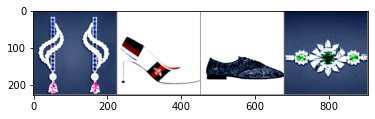

earrings -|- shoes -|- shoes -|- bracelet -|-


In [3]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:4]))
print(' '.join('%5s -|-' % classes[labels[j]] for j in range(4)))

# Model training

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alex = AlexNet().to(device)

optimizer = torch.optim.Adam(alex.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [6]:
modelTrain(alex, train_loader, optimizer, criterion, epoch=10)

--- Training started ---
epoch: 1 loss: 2.1703
epoch: 2 loss: 1.8954
epoch: 3 loss: 1.6859
epoch: 4 loss: 1.5043
epoch: 5 loss: 1.3438
epoch: 6 loss: 1.2437
epoch: 7 loss: 1.0770
epoch: 8 loss: 0.9426
epoch: 9 loss: 0.8432
epoch: 10 loss: 0.8261
--- Finished Training ---


In [7]:
PATH = './models/AlexNet_Adam.pth'
saveModel(alex, PATH)

'Model saved successfully'

# Model Loading

In [4]:
alex = AlexNet()
PATH = './models/AlexNet_Adam.pth'
loadModel(alex, PATH)

'Model loaded successfully'

# Model Testing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


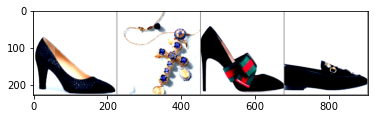

Vrai::  shoes necklace shoes shoes


In [9]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('Vrai:: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
outputs = alex(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  shoes handbag shoes shoes


# Model accuracy

In [11]:
modelAccurcy(alex, test_loader, classes)

----- Accuracy for each class ----
- shoes : 83.75 %
- lipstick : 61.76 %
- handbag : 72.41 %
- nail polish : 59.26 %
- necklace : 57.69 %
- watches : 43.48 %
-  ring : 77.78 %
- bracelet : 28.00 %
- boots : 42.42 %
- earrings : 78.79 %
--------------------------------------------------
Accuracy of the network on the test images: 66.09 %


# Similar Product

## - Load Data

In [2]:
tf = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = LoadData(csv_file='Data\style\style.csv', root_dir='Data\style', transform = tf)
data_loader = DataLoader(dataset=dataset)

## - Laod Model

In [3]:
alex = AlexNet()
PATH = './models/AlexNet_Adam.pth'
loadModel(alex, PATH)

'Model loaded successfully'

## - Extract features of Images

In [4]:
imgs_features = extract_imgsFeatures(alex, data_loader)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(2184, 4096)

## - Compute Similarities

In [5]:
df_cosSim = product_similatity(imgs_features, imgsFile_path="Data/style/", csvFileName="CosSimilarity_AlexAdam")

File saved successfully in similarity_csv/CosSimilarity_AlexAdam.csv


In [6]:
df_cosSim.head()

,0_0_001.png,0_0_002.png,0_0_003.png,0_0_004.png,0_0_005.png,0_0_006.png,0_0_007.png,0_0_008.png,0_0_009.png,0_0_010.png,...,6_9_012.png,6_9_013.png,6_9_014.png,6_9_015.png,6_9_016.png,6_9_017.png,6_9_018.png,6_9_019.png,6_9_020.png,6_9_021.png
0_0_001.png,1.000000,0.926700,0.637853,0.946574,0.563912,0.805141,0.859775,0.776037,0.535701,0.390947,...,0.387569,0.442819,0.473331,0.374673,0.459426,0.414935,0.498390,0.435540,0.508816,0.465251
0_0_002.png,0.926700,1.000000,0.781636,0.956092,0.709534,0.813314,0.827947,0.810958,0.581167,0.473737,...,0.473143,0.564131,0.517264,0.435783,0.524943,0.470618,0.542545,0.486702,0.567382,0.545466
0_0_003.png,0.637853,0.781636,1.000000,0.773192,0.945093,0.671696,0.626264,0.718934,0.662279,0.542856,...,0.640835,0.784425,0.601913,0.664611,0.655404,0.613514,0.658907,0.576025,0.662544,0.698100
0_0_004.png,0.946574,0.956092,0.773192,1.000000,0.686059,0.802389,0.823888,0.800386,0.614695,0.495107,...,0.531725,0.609890,0.592343,0.522711,0.577857,0.550336,0.611234,0.569313,0.587685,0.600566
0_0_005.png,0.563912,0.709534,0.945093,0.686059,1.000000,0.610328,0.587152,0.649572,0.638453,0.509863,...,0.622917,0.755015,0.549582,0.639647,0.633660,0.575629,0.625249,0.526334,0.671988,0.646951


## - Most similar products

In [ ]:
#import pandas as pd
#df_cosSim = pd.read_csv("similarity_csv/CosSimilarity_AlexAdam.csv", index_col=[0])
#df_cosSim.set_index(df_cosSim.columns)
#df_cosSim.head()

In [7]:
imgs_names = imgs_names("Data/style/")
imgs_names[:10]

['0_0_001.png',
 '0_0_002.png',
 '0_0_003.png',
 '0_0_004.png',
 '0_0_005.png',
 '0_0_006.png',
 '0_0_007.png',
 '0_0_008.png',
 '0_0_009.png',
 '0_0_010.png']

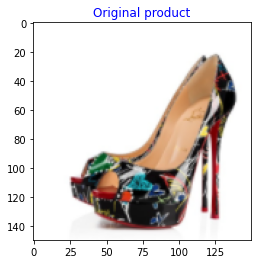

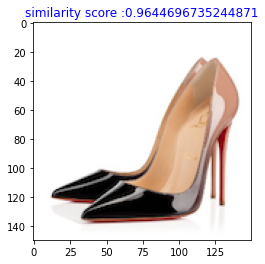

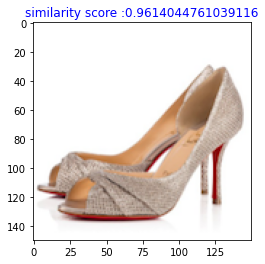

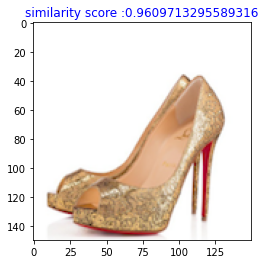

In [8]:
similar_products(df_cosSim, imgs_names[0], 3)